# Exploring the Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [5]:
path = "https://raw.githubusercontent.com/srjlsd/Data_Manupilation/main/googleplaystore.csv"
df= pd.read_csv(path)

In [6]:
app = df.copy() # Let's take a copy of our data and make our modification in it to avoid any mistakes

In [7]:
app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1914,Zombie Tsunami,GAME,4.4,4921451,Varies with device,"100,000,000+",Free,0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device
9157,POGO Games,FAMILY,3.8,32600,26M,"1,000,000+",Free,0,Everyone,Casual,"February 22, 2017",1.4.10,4.1 and up
4356,360-M Flight,TOOLS,3.9,84,24M,"10,000+",Free,0,Everyone,Tools,"December 14, 2017",2.18,4.0.3 and up
5511,AQ Dentals,HEALTH_AND_FITNESS,NaN,0,12M,10+,Free,0,Everyone,Health & Fitness,"December 22, 2017",1.0.1,4.1 and up
9375,Fit the Fat 2,SPORTS,3.8,35746,55M,"5,000,000+",Free,0,Everyone,Sports,"December 15, 2017",1.4.3,4.0.3 and up


In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# 1 Clean the duplicates

In [8]:
app.shape

(10841, 13)

In [9]:
app= app.drop_duplicates() # First we dropped all duplicates from our data

In [10]:
app.shape

(10358, 13)

# 2 Clean the Nan Values

In [11]:
# Now Lets try to clean the non Value
app.isna().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 2-1 Rating Nan Values

In [12]:
# We notice that we have 1465 rating non value 
# We will assign this value to the average value of the Rating column

In [13]:
Rating_mean = app.Rating.mean()
app.Rating.fillna(Rating_mean,inplace= True) # We changed the original non value to be equal to the average
app.Rating.isna().sum() # Verify that we have no more non value in Rating column

0

## 2-2 Type Nan Values

In [14]:
app.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [15]:
# Check this data when Type is zero
app.loc[app['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
# we notice that there is a row with deviated data values. that is why we need to delete this raw

In [17]:
# remove the record where 'Type' is having 0 value
index = app.loc[app['Type']=='0'].index
app.drop(axis=0,inplace=True,index= index)

In [18]:
app.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [19]:
app.loc[app['Type'].isna()]
# We notice that null type value in type doesn't convey any numerical information, this row will be deleted

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.189542,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [20]:
# remove the record where 'Type' is having 0 value
index= app.loc[app['Type'].isna()].index
app.drop(axis=0,inplace=True,index=index)

In [21]:
app.Type.unique()

array(['Free', 'Paid'], dtype=object)

## 2-3 Current ver Nan Values

In [22]:
app.loc[app['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.200000,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.100000,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.200000,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.189542,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.000000,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.189542,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.189542,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.189542,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [23]:
# the NaN values in this case are just some unknown data that can be replaced by the word "unknown"
app['Current Ver'].fillna('unknown',inplace= True)

In [24]:
app['Current Ver'].isna().sum() # verify that "Current ver" have no nan values

0

## 2-4 Android Ver Nan Values

In [25]:
app.loc[app["Android Ver"].isna()] # look how the table look with Android ver NaN

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [26]:
app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10020,EdiRange,TOOLS,3.000000,736,1.8M,"100,000+",Free,0,Everyone,Tools,"July 5, 2017",1.11,4.0.3 and up
8586,DN Sync,NEWS_AND_MAGAZINES,4.100000,56,28k,"1,000+",Free,0,Everyone 10+,News & Magazines,"June 13, 2016",1.15,2.3.3 and up
5211,Message AI - Write Better Messages (Free),SOCIAL,3.700000,3,7.9M,100+,Free,0,Everyone,Social,"July 4, 2018",1.3.1-lite,5.0 and up
3515,Solid Explorer Classic,PRODUCTIVITY,4.500000,49794,6.5M,"1,000,000+",Free,0,Everyone,Productivity,"June 17, 2017",1.7.3,2.3 and up
8488,S-Home DK,LIFESTYLE,4.189542,4,17M,"1,000+",Free,0,Everyone,Lifestyle,"October 18, 2017",1.26,4.0 and up


In [27]:
app.isna().sum() # the nan values data is cleaned

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

# 3 Convert the object values into numeric values

## 3.1 Convert the 'Reviews' data and change the type 'object' to 'float'

In [28]:
app.Reviews.dtypes

dtype('O')

In [29]:
app["Reviews"]= app["Reviews"].astype(float)

In [30]:
app.Reviews.dtypes

dtype('float64')

## 3.2 Convert the 'Size' data and change the type 'object' to 'float'

In [31]:
app.Size.sample(5)

9526    2.0M
7803     18M
6013    3.2M
8345     14M
8174     22M
Name: Size, dtype: object

In [32]:
sizes = [i for i in app['Size']] # create a list that contains all "Size" column data

In [33]:
def clean_sizes (size_list):
    clean_data = []
    for Size in size_list :
        if 'M' in Size :
            Size = Size.replace('M','')
            Size = float(Size)
        elif 'k' in Size :
            Size = Size.replace('k','')
            Size = float(Size)/1024
        elif 'Varies with device' in Size :
            Size = Size.replace('Varies with device','')
            Size = float(0)
        clean_data.append(Size)
    return clean_data
        

In [34]:
app['Size'] = clean_sizes(sizes)
app['Size'] = app['Size'].astype(float)

In [35]:
app.Size.dtypes

dtype('float64')

In [36]:
app.Size.sample(5)

2697    24.0
7504     3.4
2449    13.0
8840     5.0
4797    41.0
Name: Size, dtype: float64

In [84]:
app.loc[app['Size']==0,'Size']=app.Size.median()

## 3.3 Convert the 'Installs' data and change the type 'object' to 'float'

In [37]:
app.Installs.sample(5)

8997         1,000+
7544     5,000,000+
10404          500+
121         10,000+
7878           100+
Name: Installs, dtype: object

In [38]:
installs=[i for i in app['Installs']]

In [39]:
def clean_installs(installs_list):
    clean_data = []
    for installs in installs_list :
        if '+' in installs :
            installs = installs.replace('+','')
        if ',' in installs :
            installs = installs.replace(',','')
        clean_data.append(installs)
    return clean_data

In [40]:
app['Installs'] = clean_installs(installs)
app['Installs'] = app['Installs'].astype(float)

In [41]:
app.Installs.dtype

dtype('float64')

In [42]:
app.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5016,AE Bulletins,BOOKS_AND_REFERENCE,4.5,14.0,30.0,1000.0,Free,0,Everyone,Books & Reference,"July 18, 2018",2.2.5,4.0.3 and up
4198,AntennaPict β,COMMUNICATION,4.3,15439.0,2.2,1000000.0,Free,0,Everyone,Communication,"November 7, 2016",2.0.0,2.3 and up
7077,Zoosk Dating App: Meet Singles,DATING,4.0,516917.0,0.0,10000000.0,Free,0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device
8665,How well do you know me?,GAME,3.9,1290.0,6.4,100000.0,Free,0,Everyone,Word,"July 26, 2018",2.3.0,4.1 and up
2561,Who Viewed My Facebook Profile - Stalkers Visi...,SOCIAL,4.6,271445.0,9.9,5000000.0,Free,0,Everyone,Social,"June 24, 2018",4.1.1,4.0.3 and up


## 3.4 Convert the 'Price' data and change the type 'object' to 'float'

In [43]:
prices = [i for i in app['Price']]

In [44]:
def clean_prices (Price_list):
    clean_data = []
    for price in Price_list : 
        if '$' in price :
            price = price.replace('$','')
        clean_data.append(price)
    return (clean_data)

In [45]:
app['Price'] = clean_prices(prices)
app['Price'] = app['Price'].astype(float)

In [46]:
app.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [47]:
app.Price.dtype

dtype('float64')

# 4 Analysis and Visualization

In [48]:
### Get the Top installed apps
Top_install= app.sort_values(by='Installs',ascending=False)[0:3] # Top 3 installed apps
Top_install

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
341,Hangouts,COMMUNICATION,4.0,3419249.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3928,YouTube,VIDEO_PLAYERS,4.3,25623548.0,0.0,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483.0,0.0,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device


## 4.1 Get the Total installs for each category

In [49]:
Category_installs= app.groupby('Category')['Installs'].sum().reset_index()

In [50]:
Category_installs.head(5)

,Category,Installs
0,ART_AND_DESIGN,1.243381e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.916470e+09
4,BUSINESS,8.636649e+08


In [51]:
Category_installs.sort_values('Installs',ascending= False).head(5)

,Category,Installs
14,GAME,3.154402e+10
6,COMMUNICATION,2.415228e+10
27,SOCIAL,1.251387e+10
25,PRODUCTIVITY,1.246309e+10
29,TOOLS,1.145277e+10


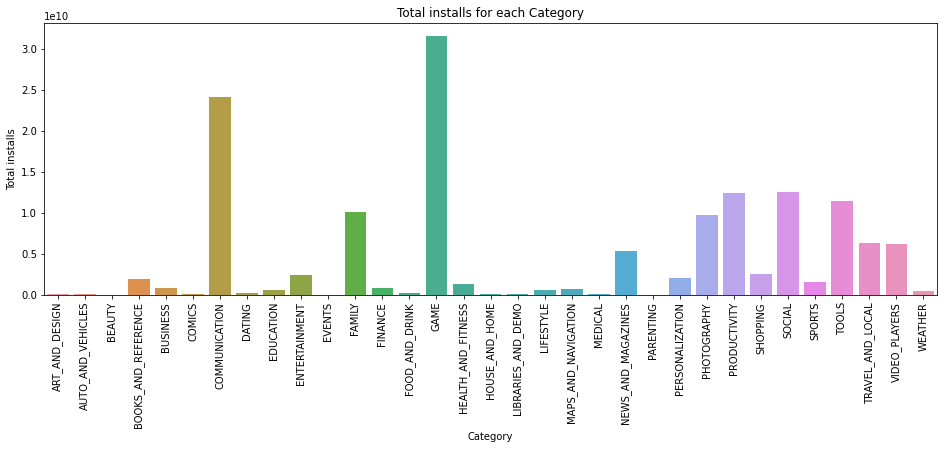

In [52]:
plt.figure(figsize=(16,5))
sns.barplot(x='Category',y='Installs',data=Category_installs)
plt.xticks(rotation=90)
plt.ylabel('Total installs')
plt.title('Total installs for each Category')
plt.show()

## How many apps are free and how many are not ?

In [53]:
paid_free= app.groupby('Type')['App'].count().reset_index()

In [54]:
paid_free

,Type,App
0,Free,9591
1,Paid,765


## Count the Apps in each Category with Type distinction (Free or Paid) ? 

In [55]:
Category_Type = app.groupby(['Category','Type'])['App'].count().reset_index()

In [56]:
Category_Type

,Category,Type,App
0,ART_AND_DESIGN,Free,62
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,82
3,AUTO_AND_VEHICLES,Paid,3
4,BEAUTY,Free,53
...,...,...,...
58,TRAVEL_AND_LOCAL,Paid,12
59,VIDEO_PLAYERS,Free,171
60,VIDEO_PLAYERS,Paid,4
61,WEATHER,Free,74


In [57]:
Category_Type= app.groupby(['Category','Type'])['App'].count().reset_index().pivot(index='Category',columns='Type',values='App').reset_index()
# We have to use the full code in a single line to delete the multi index structure, this way we can easily access those columns for plotting

In [58]:
Category_Type.head(5)

Type,Category,Free,Paid
0,ART_AND_DESIGN,62.0,3.0
1,AUTO_AND_VEHICLES,82.0,3.0
2,BEAUTY,53.0,NaN
3,BOOKS_AND_REFERENCE,202.0,28.0
4,BUSINESS,415.0,12.0


In [59]:
Category_Type.columns

Index(['Category', 'Free', 'Paid'], dtype='object', name='Type')

In [60]:
type(Category_Type['Category'])

pandas.core.series.Series

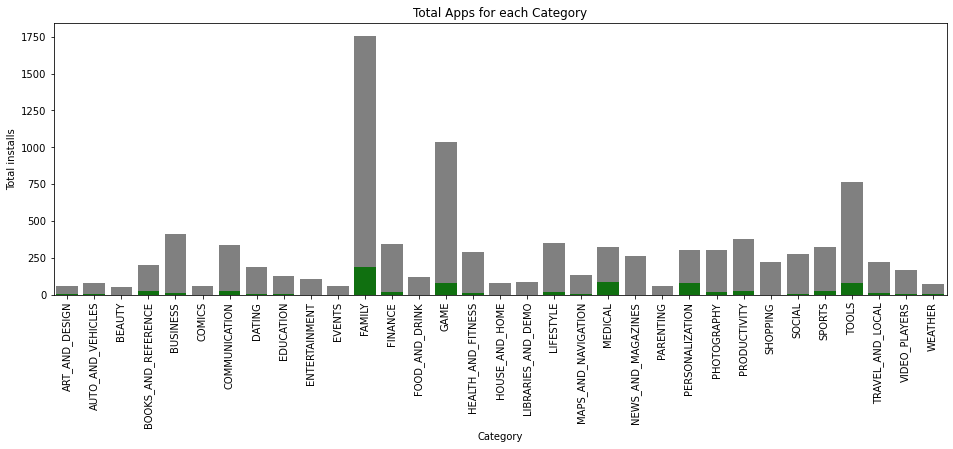

In [61]:
plt.figure(figsize=(16,5))
sns.barplot(x=Category_Type['Category'],y=Category_Type["Free"],color='grey')
sns.barplot(x=Category_Type['Category'],y=Category_Type["Paid"],color='green')
plt.xticks(rotation=90)
plt.ylabel('Total installs')
plt.title('Total Apps for each Category')
plt.show()

## 4.2 Get  the Total prices of "paid app" in each category

In [62]:
#paid_app = app.loc[app['Price']!= 0]
#paid_app.head(5)

In [63]:
#paid_app.shape

In [64]:
Total_prices_by_category= app.groupby('Category')['Price'].sum().reset_index()

In [103]:
Total_prices_by_category.head(6)

,Category,Price
0,ART_AND_DESIGN,5.97
1,AUTO_AND_VEHICLES,13.47
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,119.77
4,BUSINESS,175.29
5,COMICS,0.00


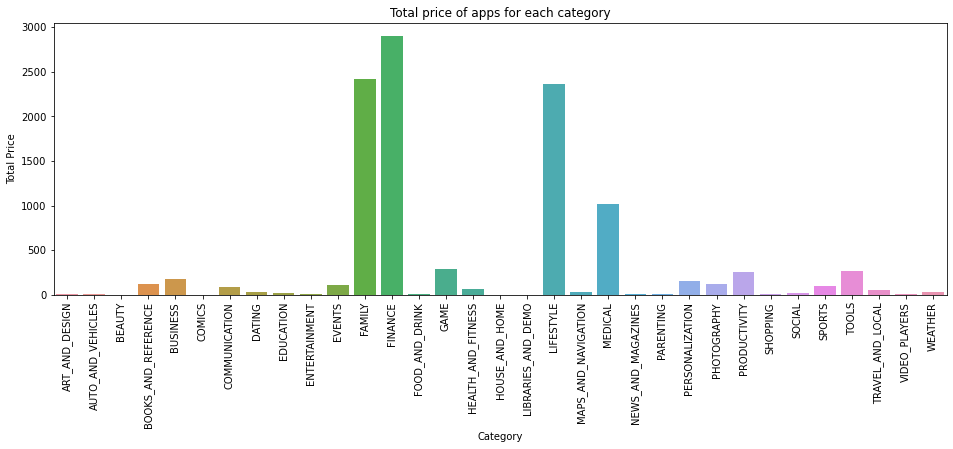

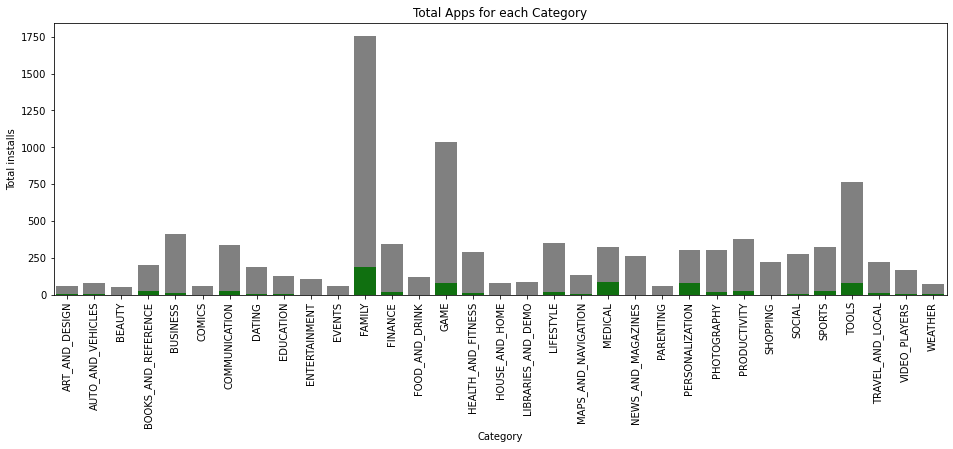

In [66]:
plt.figure(figsize=(16, 5))
sns.barplot(x='Category', y='Price', data=Total_prices_by_category)
plt.xticks(rotation=90)
plt.ylabel('Total Price')
plt.title('Total price of apps for each category')
plt.show()
plt.figure(figsize=(16,5))
sns.barplot(x=Category_Type['Category'],y=Category_Type["Free"],color='grey')
sns.barplot(x=Category_Type['Category'],y=Category_Type["Paid"],color='green')
plt.xticks(rotation=90)
plt.ylabel('Total installs')
plt.title('Total Apps for each Category')
plt.show()

######  We can see that most of the apps generating income are from the categories of 'Finance' , 'Lifestyle', 'Family' and 'Medical'.
###### We notice that despite the low number of apps in Finance it is the most generating Category in Google Store
###### Family comes second in terms of prices but the number of existing Apps is still high which means it is a competitive Category

## Total profit of each category

In [137]:
app['Income']= app['Installs'] * app[('Price')]

In [138]:
Total_Income_by_category= app.groupby('Category')['Income'].sum().reset_index()

In [ ]:
Total_Income_by_category

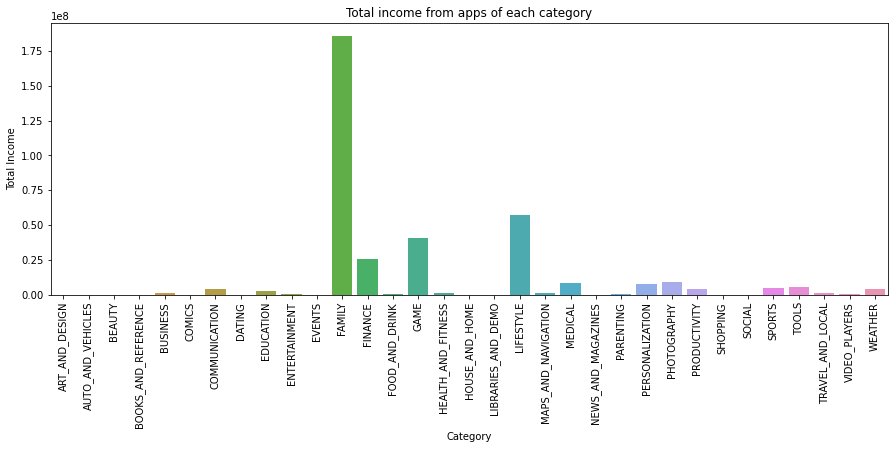

In [139]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Income', data=Total_Income_by_category)
plt.xticks(rotation=90)
plt.ylabel('Total Income')
plt.title('Total income from apps of each category')
plt.show()

##### We can clearly see that the biggest slice of profit in this market is going to Family Category
##### the sum of prices in Tools Category is in top 3, However looking at the income it is not generating that, this would mean that it is not attracting the users
##### Also this chart indicate that some categories are generating zero income

# print a table and a plot chart for top 5 download apps in each category free and paid (if there is paid)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.000000,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4241,Textgram - write on photos,ART_AND_DESIGN,4.4,295237.0,18.152679,10000000.0,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device,0.0
45,"Canva: Poster, banner, card maker & graphic de...",ART_AND_DESIGN,4.7,174531.0,24.000000,10000000.0,Free,0.0,Everyone,Art & Design,"July 31, 2018",1.6.1,4.1 and up,0.0
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31.000000,10000000.0,Free,0.0,Everyone,Art & Design,"July 30, 2018",5.5.4,4.1 and up,0.0
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829.0,20.000000,10000000.0,Free,0.0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,0.0


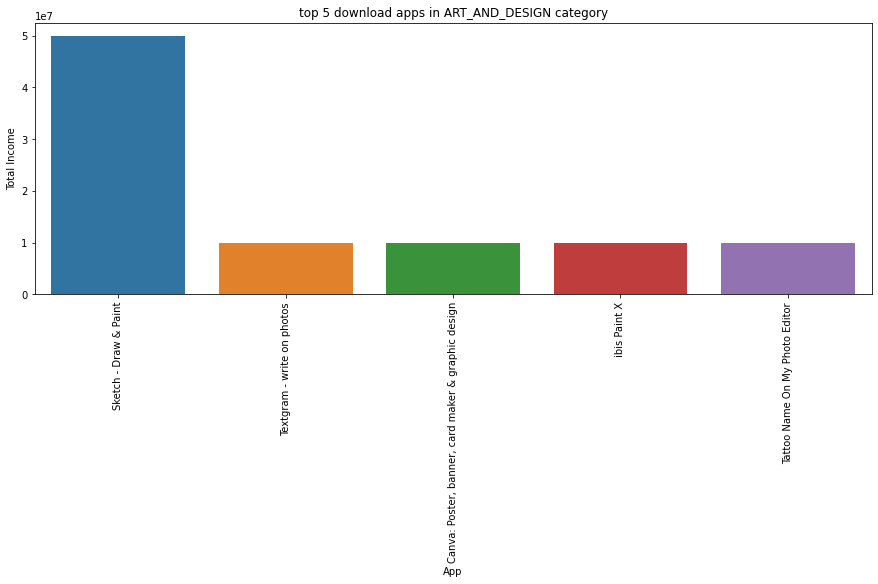

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
8289,AutoScout24 - used car finder,AUTO_AND_VEHICLES,4.4,186648.0,42.000000,10000000.0,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",9.3.52,4.2 and up,0.0
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920.0,16.000000,10000000.0,Free,0.0,Teen,Auto & Vehicles,"July 11, 2018",Varies with device,5.0 and up,0.0
69,Used cars for sale - Trovit,AUTO_AND_VEHICLES,4.2,52530.0,7.000000,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 16, 2018",4.47.3,4.0.3 and up,0.0
70,Fines of the State Traffic Safety Inspectorate...,AUTO_AND_VEHICLES,4.8,116986.0,35.000000,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"August 2, 2018",1.9.7,4.0.3 and up,0.0
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,18.152679,5000000.0,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device,0.0


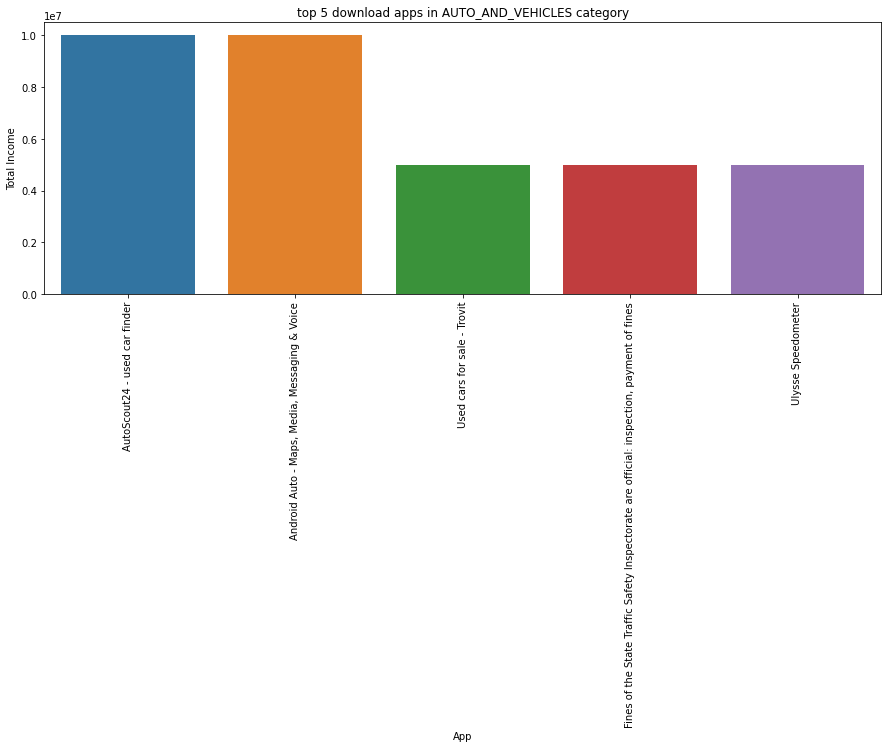

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
117,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715.0,18.152679,10000000.0,Free,0.0,Everyone,Beauty,"August 3, 2017",Varies with device,Varies with device,0.0
7021,Best Hairstyles step by step,BEAUTY,4.5,45452.0,9.200000,5000000.0,Free,0.0,Everyone,Beauty,"July 19, 2018",1.25,4.0 and up,0.0
107,Ulta Beauty,BEAUTY,4.7,42050.0,18.152679,1000000.0,Free,0.0,Everyone,Beauty,"June 5, 2018",5.4,5.0 and up,0.0
109,Selfie Camera,BEAUTY,4.2,17934.0,18.152679,1000000.0,Free,0.0,Everyone,Beauty,"September 12, 2017",Varies with device,Varies with device,0.0
102,Mirror - Zoom & Exposure -,BEAUTY,3.9,32090.0,18.152679,1000000.0,Free,0.0,Everyone,Beauty,"October 24, 2016",Varies with device,Varies with device,0.0


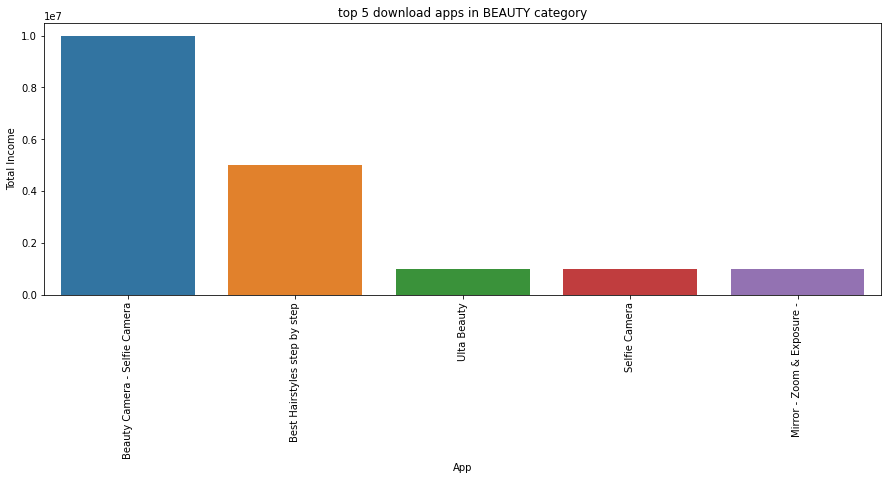

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,18.152679,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,0.0
4083,Amazon Kindle,BOOKS_AND_REFERENCE,4.2,814151.0,18.152679,1.000000e+08,Free,0.0,Teen,Books & Reference,"July 27, 2018",Varies with device,Varies with device,0.0
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189.0,18.152679,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,0.0
3941,Bible,BOOKS_AND_REFERENCE,4.7,2440695.0,18.152679,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 2, 2018",Varies with device,Varies with device,0.0
5651,Audiobooks from Audible,BOOKS_AND_REFERENCE,4.5,568922.0,18.152679,1.000000e+08,Free,0.0,Teen,Books & Reference,"August 1, 2018",Varies with device,Varies with device,0.0


C:\Users\kulpsales2\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128214 (\N{OPEN BOOK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


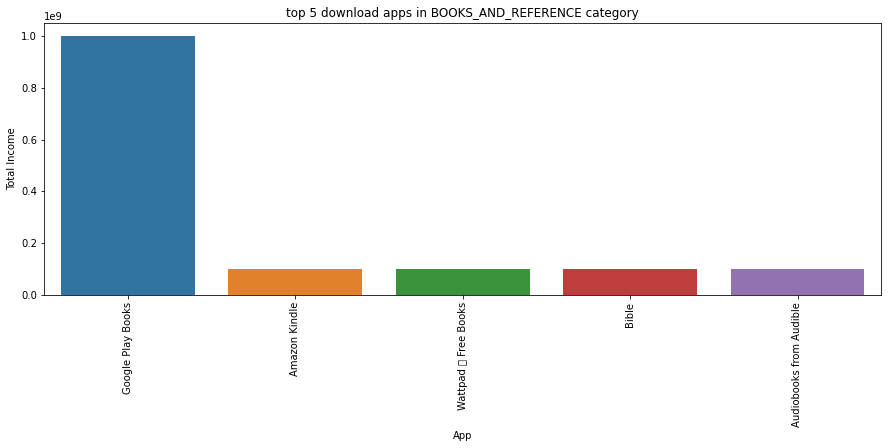

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861.0,35.000000,100000000.0,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up,0.0
10253,File Commander - File Manager/Explorer,BUSINESS,4.3,758590.0,12.000000,100000000.0,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,4.1 and up,0.0
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35.000000,100000000.0,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up,0.0
188,Indeed Job Search,BUSINESS,4.3,674730.0,18.152679,50000000.0,Free,0.0,Everyone,Business,"May 21, 2018",Varies with device,Varies with device,0.0
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730.0,18.152679,50000000.0,Free,0.0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device,0.0


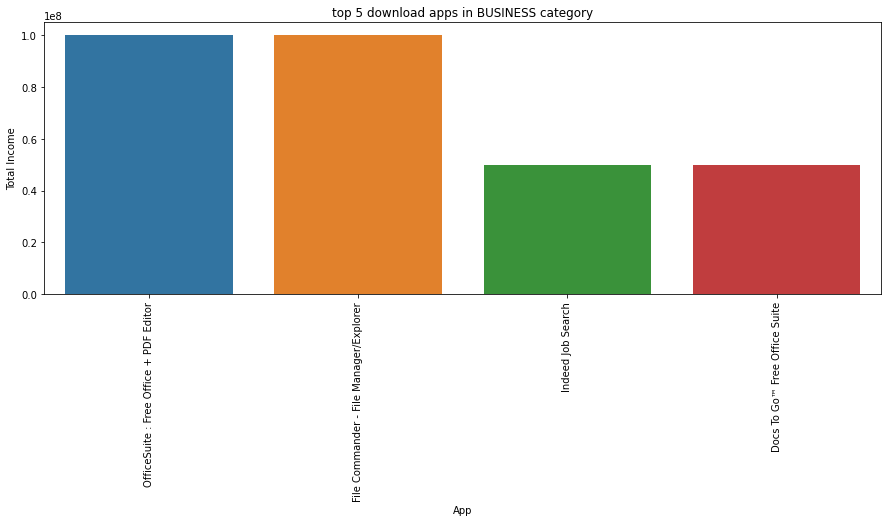

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4724,LINE WEBTOON - Free Comics,COMICS,4.5,1013944.0,18.152679,10000000.0,Free,0.0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device,0.0
297,LINE WEBTOON - Free Comics,COMICS,4.5,1013635.0,18.152679,10000000.0,Free,0.0,Teen,Comics,"July 31, 2018",Varies with device,Varies with device,0.0
320,Narrator's Voice,COMICS,4.5,564387.0,18.152679,5000000.0,Free,0.0,Everyone,Comics,"July 5, 2018",Varies with device,Varies with device,0.0
330,Perfect Viewer,COMICS,4.4,51981.0,18.152679,5000000.0,Free,0.0,Everyone,Comics,"August 1, 2018",4.2.0.2,2.3 and up,0.0
311,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965.0,15.000000,5000000.0,Free,0.0,Teen,Comics,"July 3, 2018",6.3.0,4.0.3 and up,0.0


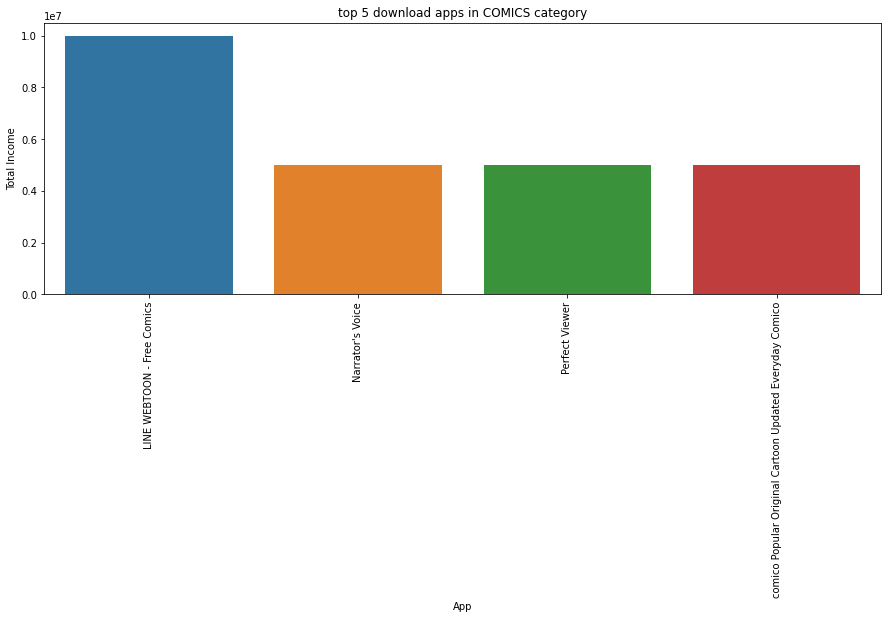

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
341,Hangouts,COMMUNICATION,4.0,3419249.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,0.0
451,Gmail,COMMUNICATION,4.3,4604483.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,0.0
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,0.0
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,0.0


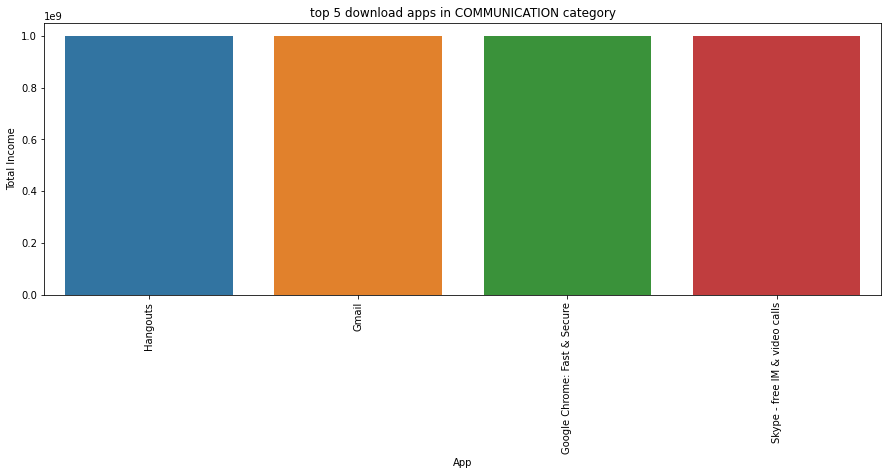

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
7077,Zoosk Dating App: Meet Singles,DATING,4.0,516917.0,18.152679,10000000.0,Free,0.0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device,0.0
6286,"Moco - Chat, Meet People",DATING,4.2,313769.0,18.152679,10000000.0,Free,0.0,Mature 17+,Dating,"August 4, 2018",2.6.142,4.1 and up,0.0
6288,Hot or Not - Find someone right now,DATING,4.1,305737.0,18.152679,10000000.0,Free,0.0,Mature 17+,Dating,"August 2, 2018",Varies with device,Varies with device,0.0
6302,OkCupid Dating,DATING,4.1,285838.0,15.000000,10000000.0,Free,0.0,Mature 17+,Dating,"July 30, 2018",11.10.1,4.1 and up,0.0
502,Find Real Love — YouLove Premium Dating,DATING,4.5,212626.0,11.000000,10000000.0,Free,0.0,Mature 17+,Dating,"July 31, 2018",4.17.2,4.1 and up,0.0


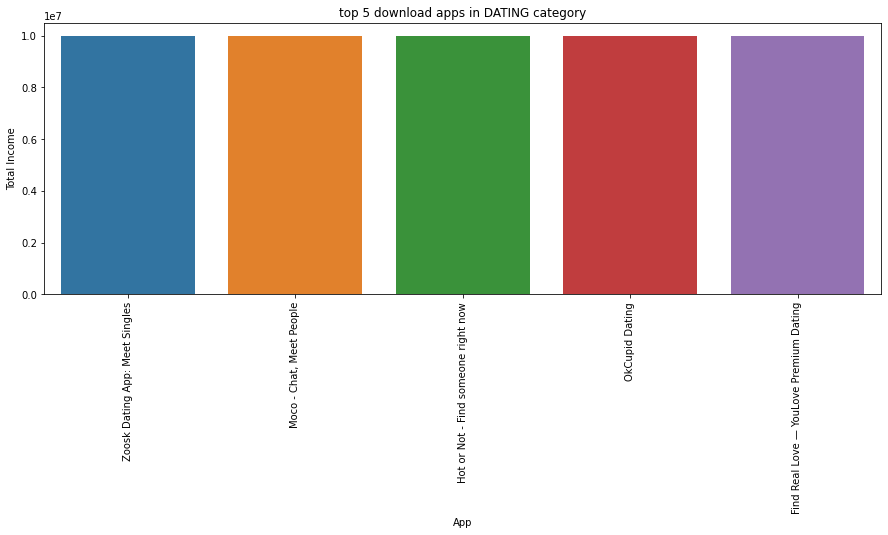

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
784,Duolingo: Learn Languages Free,EDUCATION,4.7,6290507.0,18.152679,100000000.0,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,0.0
699,Duolingo: Learn Languages Free,EDUCATION,4.7,6289924.0,18.152679,100000000.0,Free,0.0,Everyone,Education;Education,"August 1, 2018",Varies with device,Varies with device,0.0
843,ClassDojo,EDUCATION,4.4,148549.0,59.000000,10000000.0,Free,0.0,Everyone,Education;Education,"August 3, 2018",4.21.1,4.1 and up,0.0
835,"busuu: Learn Languages - Spanish, English & More",EDUCATION,4.3,206532.0,21.000000,10000000.0,Free,0.0,Everyone 10+,Education,"August 1, 2018",13.9.0.161,5.0 and up,0.0
832,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107948.0,18.152679,10000000.0,Free,0.0,Everyone,Education,"August 2, 2018",Varies with device,Varies with device,0.0


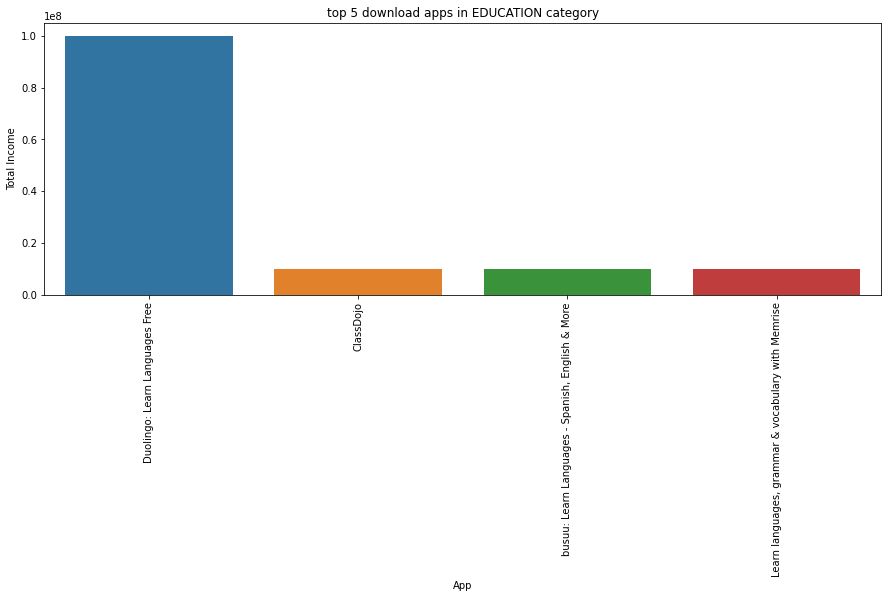

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
865,Google Play Games,ENTERTAINMENT,4.3,7165362.0,18.152679,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,0.0
855,Netflix,ENTERTAINMENT,4.4,5456208.0,18.152679,1.000000e+08,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device,0.0
931,Netflix,ENTERTAINMENT,4.4,5456599.0,18.152679,1.000000e+08,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device,0.0
958,Netflix,ENTERTAINMENT,4.4,5456708.0,18.152679,1.000000e+08,Free,0.0,Teen,Entertainment,"July 31, 2018",Varies with device,Varies with device,0.0
903,IMDb Movies & TV,ENTERTAINMENT,4.2,501497.0,12.000000,1.000000e+08,Free,0.0,Teen,Entertainment,"July 26, 2018",Varies with device,Varies with device,0.0


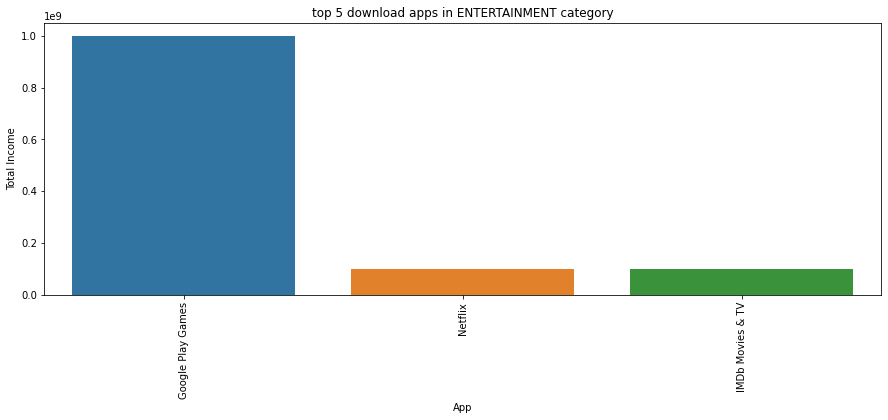

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089.0,18.152679,5000000.0,Free,0.0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device,0.0
1005,Ticketmaster Event Tickets,EVENTS,4.0,40113.0,36.000000,5000000.0,Free,0.0,Everyone,Events,"July 23, 2018",Varies with device,Varies with device,0.0
1020,"Gametime - Tickets to Sports, Concerts, Theater",EVENTS,4.5,8800.0,24.000000,1000000.0,Free,0.0,Everyone,Events,"July 17, 2018",11.1.1,5.0 and up,0.0
1014,Vivid Seats – Event Tickets,EVENTS,4.6,8232.0,53.000000,1000000.0,Free,0.0,Everyone,Events,"July 31, 2018",Varies with device,5.0 and up,0.0
1011,"SeatGeek – Tickets to Sports, Concerts, Broadway",EVENTS,4.4,15558.0,26.000000,1000000.0,Free,0.0,Everyone,Events,"August 3, 2018",2018.07.31229,5.0 and up,0.0


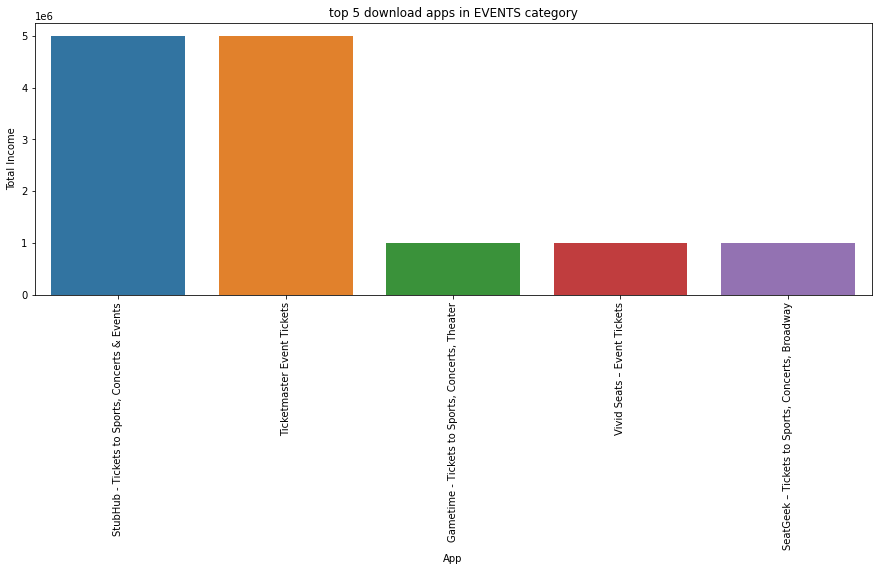

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
1083,Google Pay,FINANCE,4.2,347838.0,18.152679,100000000.0,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,0.0
1163,Google Pay,FINANCE,4.2,347874.0,18.152679,100000000.0,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,0.0
5601,Google Pay,FINANCE,4.2,348132.0,18.152679,100000000.0,Free,0.0,Everyone,Finance,"July 26, 2018",2.70.206190089,Varies with device,0.0
1076,PayPal,FINANCE,4.3,659741.0,47.000000,50000000.0,Free,0.0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,0.0
1156,PayPal,FINANCE,4.3,659760.0,47.000000,50000000.0,Free,0.0,Everyone,Finance,"July 18, 2018",6.28.0,4.4 and up,0.0


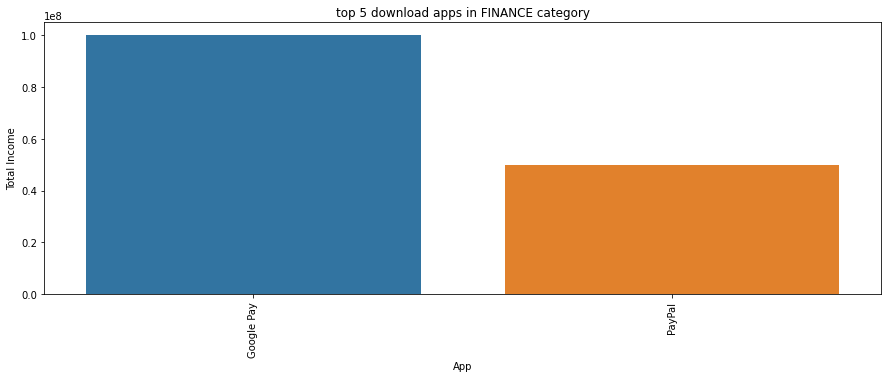

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
8727,McDonald's,FOOD_AND_DRINK,3.6,145646.0,42.000000,10000000.0,Free,0.0,Everyone,Food & Drink,"July 31, 2018",5.15.0,4.4 and up,0.0
8754,Starbucks,FOOD_AND_DRINK,4.5,455496.0,35.000000,10000000.0,Free,0.0,Everyone,Food & Drink,"August 1, 2018",4.11.1,4.4 and up,0.0
1199,Domino's Pizza USA,FOOD_AND_DRINK,4.7,1032935.0,18.152679,10000000.0,Free,0.0,Everyone,Food & Drink,"July 20, 2018",Varies with device,Varies with device,0.0
1231,Cookpad,FOOD_AND_DRINK,4.5,131569.0,8.200000,10000000.0,Free,0.0,Everyone,Food & Drink,"August 3, 2018",2.76.2.0-android,4.2 and up,0.0
1236,Foursquare City Guide,FOOD_AND_DRINK,4.1,483960.0,18.152679,10000000.0,Free,0.0,Teen,Food & Drink,"July 23, 2018",Varies with device,Varies with device,0.0


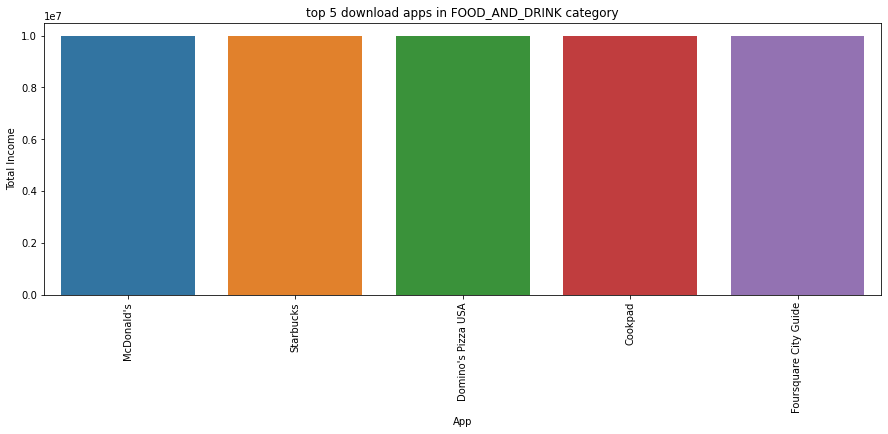

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208.0,70.000000,500000000.0,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up,0.0
1360,Period Tracker - Period Calendar Ovulation Tra...,HEALTH_AND_FITNESS,4.8,4559407.0,18.152679,100000000.0,Free,0.0,Everyone,Health & Fitness,"August 1, 2018",Varies with device,Varies with device,0.0
1286,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873516.0,18.152679,50000000.0,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device,0.0
1362,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873523.0,18.152679,50000000.0,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device,0.0
1386,Calorie Counter - MyFitnessPal,HEALTH_AND_FITNESS,4.6,1873520.0,18.152679,50000000.0,Free,0.0,Everyone,Health & Fitness,"July 31, 2018",Varies with device,Varies with device,0.0


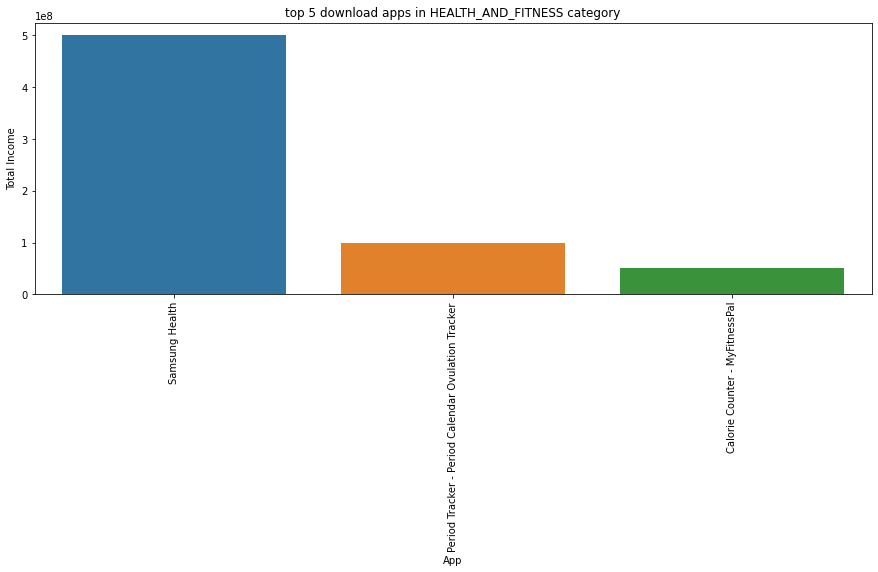

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4205,tinyCam Monitor FREE,HOUSE_AND_HOME,4.0,65914.0,18.152679,10000000.0,Free,0.0,Everyone,House & Home,"June 29, 2018",Varies with device,Varies with device,0.0
1446,Zillow: Find Houses for Sale & Apartments for ...,HOUSE_AND_HOME,4.5,417907.0,34.000000,10000000.0,Free,0.0,Everyone,House & Home,"August 1, 2018",9.8.1.7425,4.4 and up,0.0
1449,Realtor.com Real Estate: Homes for Sale and Rent,HOUSE_AND_HOME,4.5,162243.0,12.000000,10000000.0,Free,0.0,Everyone,House & Home,"July 26, 2018",8.18,4.0.3 and up,0.0
1454,Trulia Real Estate & Rentals,HOUSE_AND_HOME,4.5,175293.0,18.152679,10000000.0,Free,0.0,Everyone,House & Home,"July 24, 2018",Varies with device,Varies with device,0.0
1456,Houzz Interior Design Ideas,HOUSE_AND_HOME,4.6,353799.0,18.152679,10000000.0,Free,0.0,Everyone,House & Home,"August 1, 2018",Varies with device,Varies with device,0.0


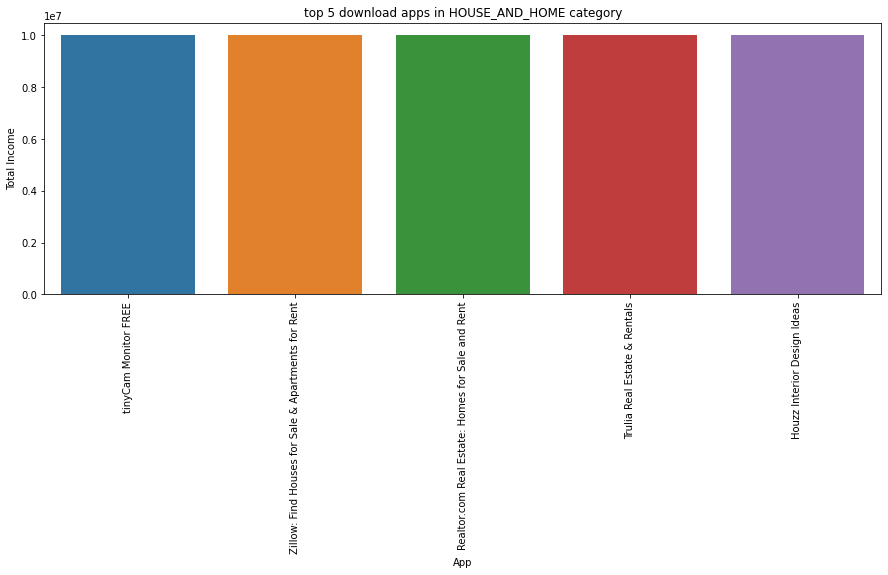

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083.0,6.300000,10000000.0,Free,0.0,Everyone,Libraries & Demo,"April 23, 2018",1.9.19,4.0 and up,0.0
6679,Cardboard,LIBRARIES_AND_DEMO,4.2,130287.0,50.000000,10000000.0,Free,0.0,Everyone,Libraries & Demo,"March 14, 2016",1.8,4.1 and up,0.0
1523,Aviary Stickers: Free Pack,LIBRARIES_AND_DEMO,3.5,126862.0,0.609375,10000000.0,Free,0.0,Everyone,Libraries & Demo,"January 17, 2012",1.0,2.2 and up,0.0
1535,Cardboard,LIBRARIES_AND_DEMO,4.2,130272.0,50.000000,10000000.0,Free,0.0,Everyone,Libraries & Demo,"March 14, 2016",1.8,4.1 and up,0.0
1521,Aviary Effects: Classic,LIBRARIES_AND_DEMO,3.8,67007.0,0.226562,5000000.0,Free,0.0,Everyone,Libraries & Demo,"March 6, 2013",1.2.0,2.2 and up,0.0


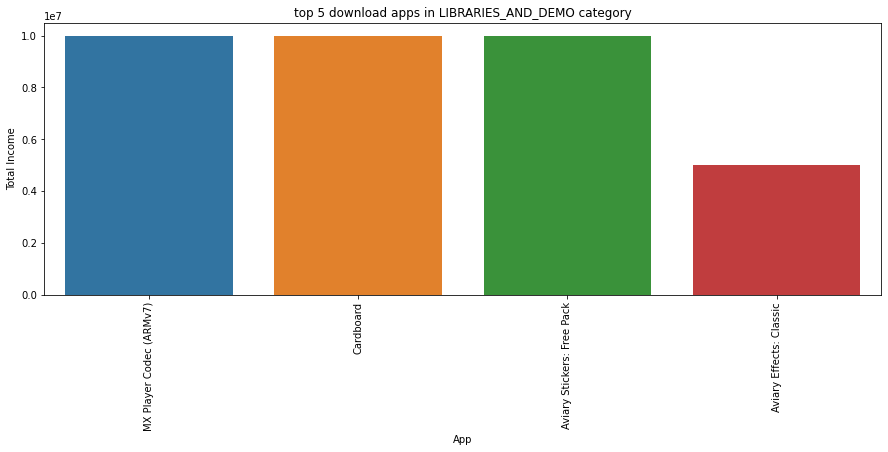

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4587,Tinder,LIFESTYLE,4.0,2789775.0,68.000000,100000000.0,Free,0.0,Mature 17+,Lifestyle,"August 2, 2018",9.5.0,4.4 and up,0.0
1584,Samsung+,LIFESTYLE,4.5,82145.0,30.000000,50000000.0,Free,0.0,Everyone,Lifestyle,"July 5, 2018",10.19.0.0,4.4 and up,0.0
8396,Daily Horoscope,LIFESTYLE,4.7,407589.0,18.152679,10000000.0,Free,0.0,Everyone,Lifestyle,"July 20, 2018",Varies with device,Varies with device,0.0
5322,Al-Moazin Lite (Prayer Times),LIFESTYLE,4.6,284670.0,18.152679,10000000.0,Free,0.0,Everyone,Lifestyle,"July 24, 2018",Varies with device,Varies with device,0.0
5349,"Muslim Pro - Prayer Times, Azan, Quran & Qibla",LIFESTYLE,4.7,1133393.0,18.152679,10000000.0,Free,0.0,Everyone,Lifestyle,"July 3, 2018",Varies with device,Varies with device,0.0


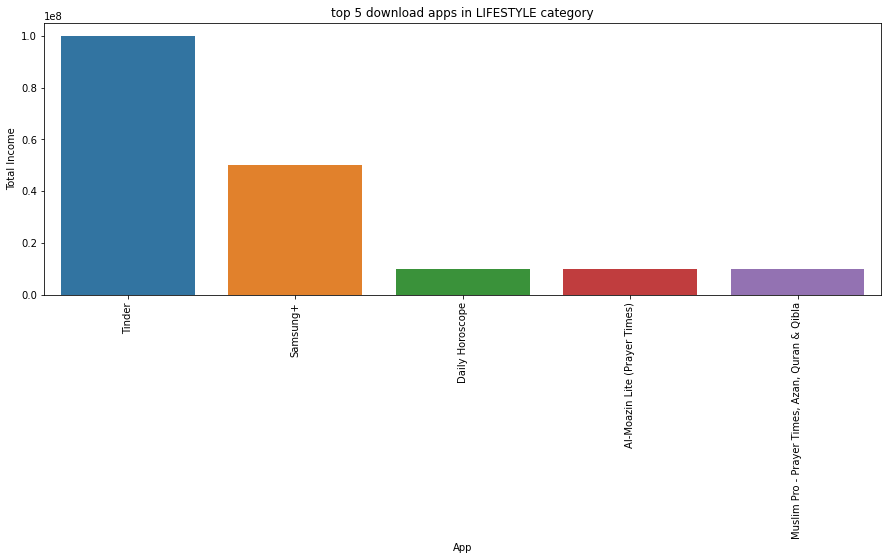

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
1700,Subway Surfers,GAME,4.5,27723193.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0
1750,Subway Surfers,GAME,4.5,27724094.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0
3896,Subway Surfers,GAME,4.5,27711703.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0
1872,Subway Surfers,GAME,4.5,27725352.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,0.0


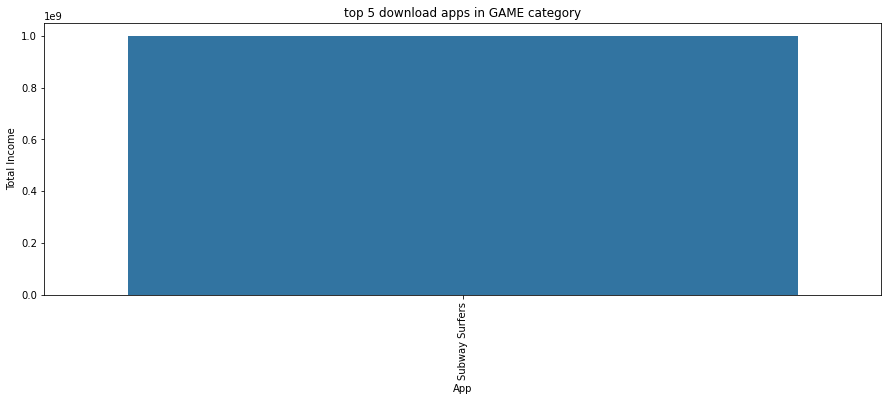

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
5856,Google Play Games,FAMILY,4.3,7168735.0,18.152679,1.000000e+09,Free,0.0,Teen,Entertainment,"July 16, 2018",Varies with device,Varies with device,0.0
3888,My Talking Tom,FAMILY,4.5,14885236.0,18.152679,5.000000e+08,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,0.0
3879,Pou,FAMILY,4.3,10483141.0,24.000000,5.000000e+08,Free,0.0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up,0.0
3994,Candy Crush Saga,FAMILY,4.4,22419455.0,74.000000,5.000000e+08,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,0.0
6849,Bubble Witch 2 Saga,FAMILY,4.3,2838064.0,18.152679,1.000000e+08,Free,0.0,Everyone,Casual,"August 6, 2018",Varies with device,Varies with device,0.0


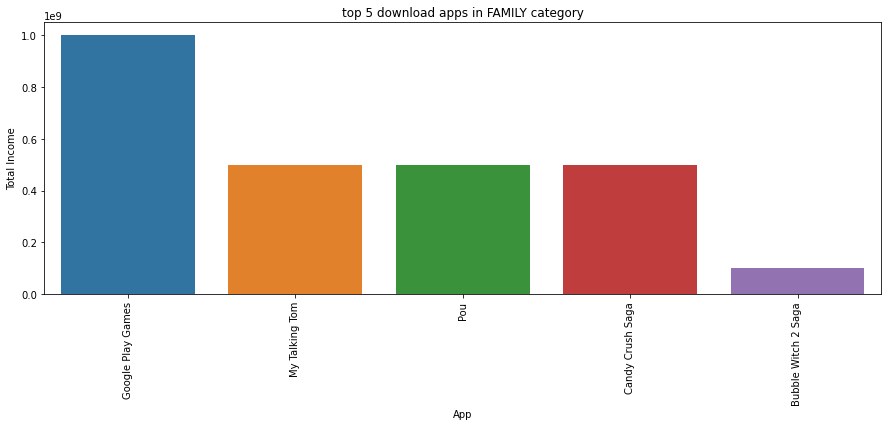

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
2319,My Calendar - Period Tracker,MEDICAL,4.7,156410.0,14.0,5000000.0,Free,0.0,Everyone,Medical,"August 3, 2018",5.9.6,4.1 and up,0.0
2310,Blood Pressure,MEDICAL,4.2,33033.0,7.4,5000000.0,Free,0.0,Everyone,Medical,"July 24, 2018",3.27.3,4.1 and up,0.0
6194,mySugr: the blood sugar tracker made just for you,MEDICAL,4.6,21187.0,35.0,1000000.0,Free,0.0,Everyone,Medical,"July 23, 2018",3.52.0,5.0 and up,0.0
2330,Ada - Your Health Guide,MEDICAL,4.7,87418.0,14.0,1000000.0,Free,0.0,Everyone,Medical,"July 16, 2018",2.25.0,4.4 and up,0.0
2510,Blood Pressure(BP) Diary,MEDICAL,3.7,3596.0,8.4,1000000.0,Free,0.0,Everyone,Medical,"July 18, 2018",4.0.9,4.0.3 and up,0.0


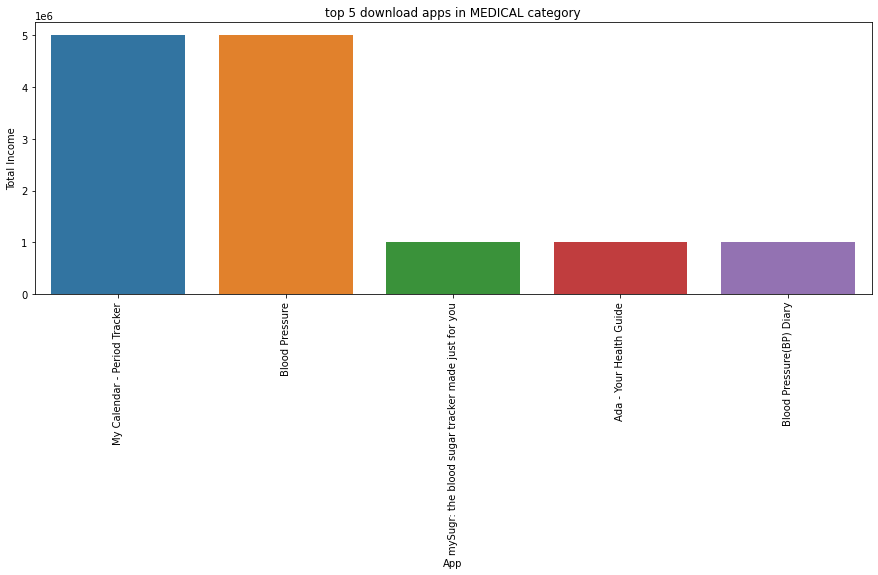

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3943,Facebook,SOCIAL,4.1,78128208.0,18.152679,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,0.0
3909,Instagram,SOCIAL,4.5,66509917.0,18.152679,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
2545,Instagram,SOCIAL,4.5,66577313.0,18.152679,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0
2554,Google+,SOCIAL,4.2,4831125.0,18.152679,1.000000e+09,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,0.0
2604,Instagram,SOCIAL,4.5,66577446.0,18.152679,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,0.0


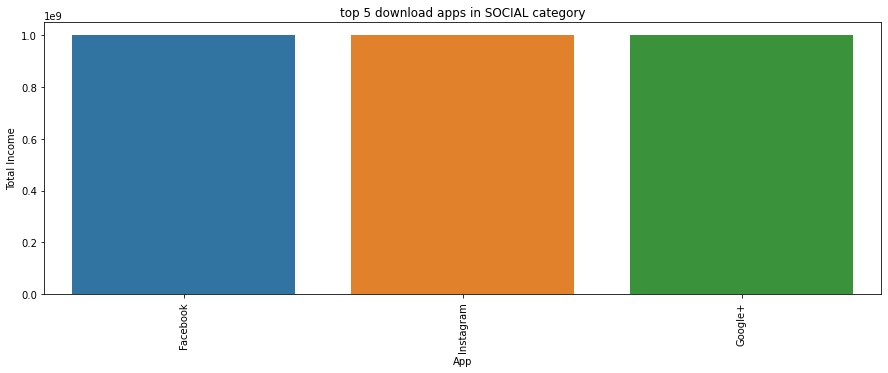

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4102,Wish - Shopping Made Fun,SHOPPING,4.5,6200739.0,15.000000,100000000.0,Free,0.0,Everyone,Shopping,"August 3, 2018",4.20.5,4.1 and up,0.0
4101,Flipkart Online Shopping App,SHOPPING,4.4,6003590.0,18.152679,100000000.0,Free,0.0,Teen,Shopping,"August 2, 2018",Varies with device,Varies with device,0.0
4099,"AliExpress - Smarter Shopping, Better Living",SHOPPING,4.6,5911055.0,18.152679,100000000.0,Free,0.0,Teen,Shopping,"August 1, 2018",Varies with device,Varies with device,0.0
4068,eBay: Buy & Sell this Summer - Discover Deals ...,SHOPPING,4.4,2788460.0,18.152679,100000000.0,Free,0.0,Teen,Shopping,"July 30, 2018",Varies with device,Varies with device,0.0
3922,Amazon Shopping,SHOPPING,4.3,908525.0,42.000000,100000000.0,Free,0.0,Teen,Shopping,"July 31, 2018",16.14.0.100,4.4 and up,0.0


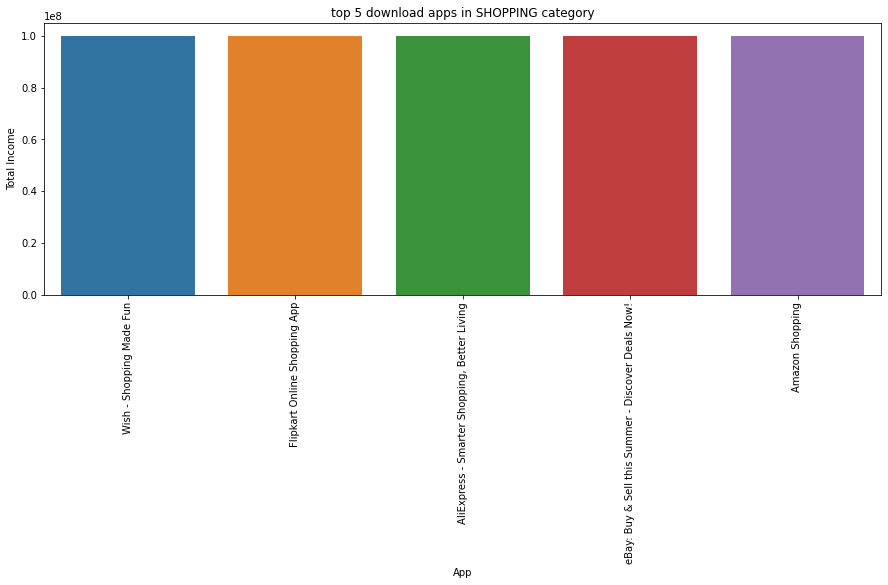

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
2808,Google Photos,PHOTOGRAPHY,4.5,10858556.0,18.152679,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0.0
2853,Google Photos,PHOTOGRAPHY,4.5,10858538.0,18.152679,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0.0
2884,Google Photos,PHOTOGRAPHY,4.5,10859051.0,18.152679,1.000000e+09,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,0.0
5395,Google Photos,PHOTOGRAPHY,4.5,10847682.0,18.152679,1.000000e+09,Free,0.0,Everyone,Photography,"August 1, 2018",Varies with device,Varies with device,0.0
6054,BeautyPlus - Easy Photo Editor & Selfie Camera,PHOTOGRAPHY,4.4,3156484.0,53.000000,1.000000e+08,Free,0.0,Everyone,Photography,"July 31, 2018",6.9.031,4.1 and up,0.0


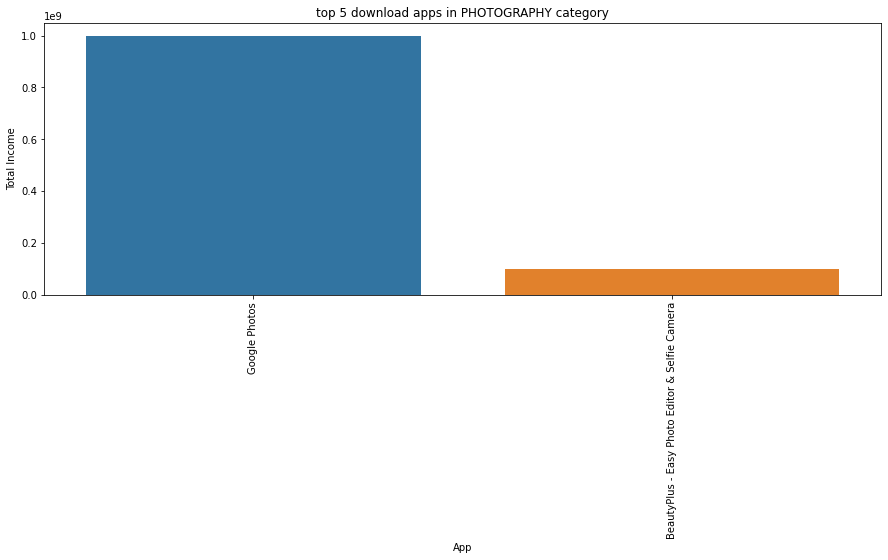

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4056,Dream League Soccer 2018,SPORTS,4.6,9873470.0,74.000000,100000000.0,Free,0.0,Everyone,Sports,"July 16, 2018",5.064,4.4 and up,0.0
4054,3D Bowling,SPORTS,4.1,1076243.0,13.000000,100000000.0,Free,0.0,Everyone,Sports,"January 18, 2018",3.1,2.0.1 and up,0.0
3953,8 Ball Pool,SPORTS,4.5,14184910.0,52.000000,100000000.0,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up,0.0
8445,FIFA Soccer,SPORTS,4.2,3909032.0,51.000000,100000000.0,Free,0.0,Everyone,Sports,"July 31, 2018",10.5.00,4.1 and up,0.0
3084,Cricbuzz - Live Cricket Scores & News,SPORTS,4.5,838765.0,18.152679,50000000.0,Free,0.0,Everyone,Sports,"May 18, 2018",Varies with device,Varies with device,0.0


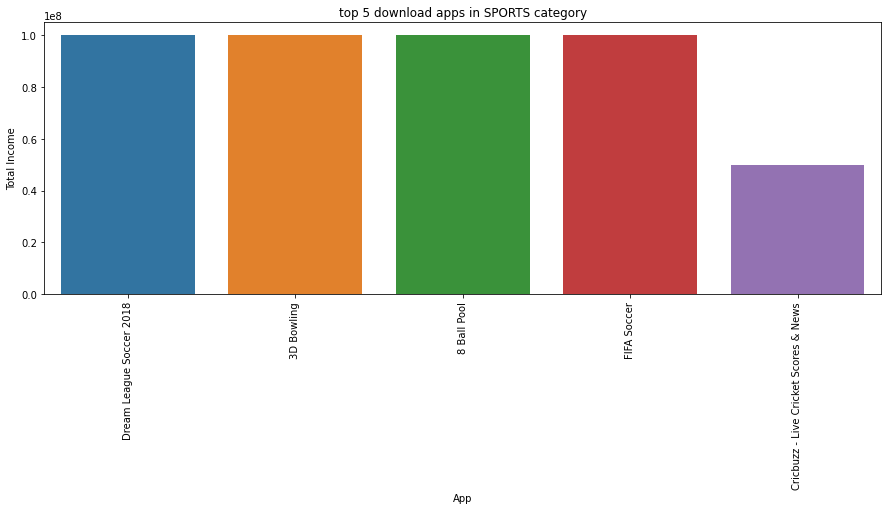

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4098,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9231613.0,18.152679,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
3232,Google Street View,TRAVEL_AND_LOCAL,4.2,2129707.0,18.152679,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,0.0
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155.0,18.152679,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
3223,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235373.0,18.152679,1.000000e+09,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,0.0
3127,Google Street View,TRAVEL_AND_LOCAL,4.2,2129689.0,18.152679,1.000000e+09,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,0.0


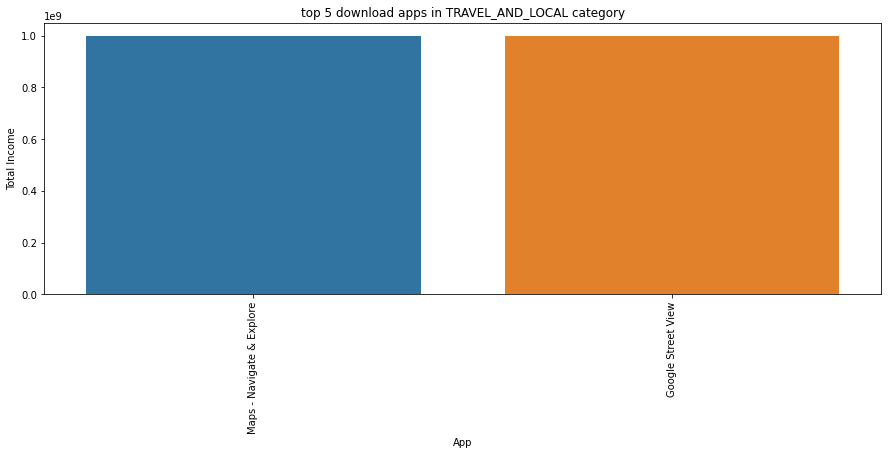

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4150,Google,TOOLS,4.4,8021623.0,18.152679,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,0.0
3234,Google,TOOLS,4.4,8033493.0,18.152679,1.000000e+09,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,0.0
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526.0,18.152679,5.000000e+08,Free,0.0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device,0.0
3235,Google Translate,TOOLS,4.4,5745093.0,18.152679,5.000000e+08,Free,0.0,Everyone,Tools,"August 4, 2018",Varies with device,Varies with device,0.0
4147,Gboard - the Google Keyboard,TOOLS,4.2,1855262.0,18.152679,5.000000e+08,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device,0.0


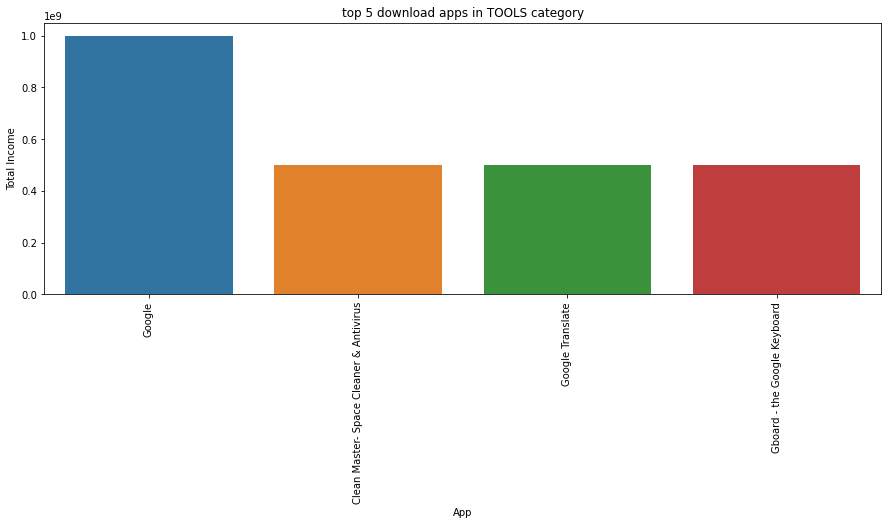

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3354,ZEDGE™ Ringtones & Wallpapers,PERSONALIZATION,4.6,6466641.0,18.152679,100000000.0,Free,0.0,Teen,Personalization,"July 19, 2018",Varies with device,Varies with device,0.0
6203,Backgrounds HD (Wallpapers),PERSONALIZATION,4.6,2390099.0,18.152679,100000000.0,Free,0.0,Teen,Personalization,"August 4, 2018",Varies with device,Varies with device,0.0
3446,"GO Keyboard - Emoticon keyboard, Free Theme, GIF",PERSONALIZATION,4.4,2591941.0,18.152679,100000000.0,Free,0.0,Everyone,Personalization,"July 20, 2018",Varies with device,Varies with device,0.0
3425,Backgrounds HD (Wallpapers),PERSONALIZATION,4.6,2390185.0,18.152679,100000000.0,Free,0.0,Teen,Personalization,"August 4, 2018",Varies with device,Varies with device,0.0
3385,"Hola Launcher- Theme,Wallpaper",PERSONALIZATION,4.5,3277209.0,7.600000,100000000.0,Free,0.0,Everyone,Personalization,"May 9, 2018",3.2.5,4.0 and up,0.0


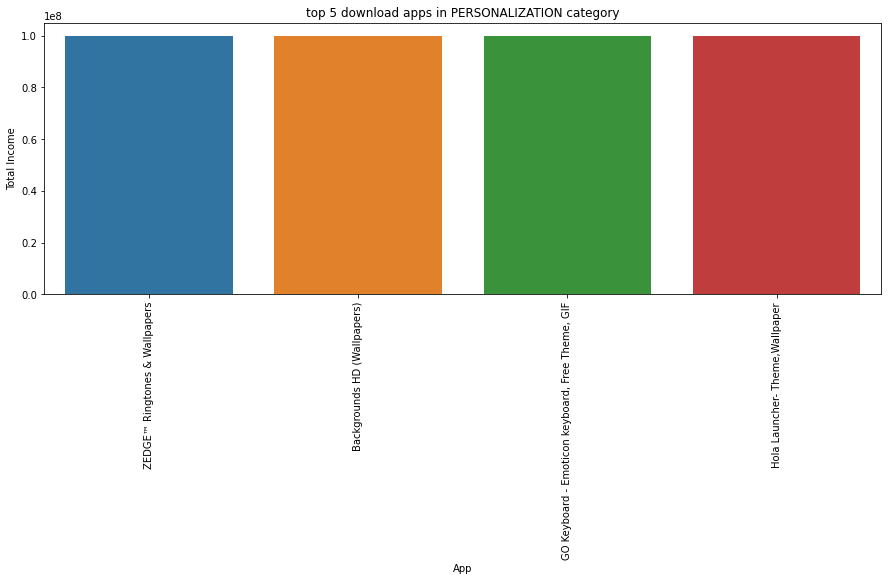

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3454,Google Drive,PRODUCTIVITY,4.4,2731171.0,18.152679,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,0.0
3523,Google Drive,PRODUCTIVITY,4.4,2731211.0,18.152679,1.000000e+09,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,0.0
4170,Google Drive,PRODUCTIVITY,4.4,2728941.0,18.152679,1.000000e+09,Free,0.0,Everyone,Productivity,"July 30, 2018",Varies with device,Varies with device,0.0
4048,Dropbox,PRODUCTIVITY,4.4,1860844.0,61.000000,5.000000e+08,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device,0.0
3522,Microsoft Word,PRODUCTIVITY,4.5,2084125.0,18.152679,5.000000e+08,Free,0.0,Everyone,Productivity,"July 11, 2018",16.0.10325.20043,4.4 and up,0.0


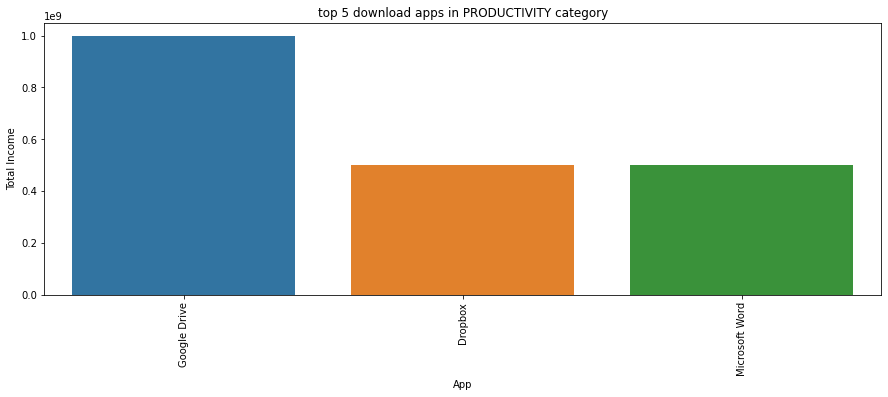

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
7229,Pregnancy Tracker & Countdown to Baby Due Date,PARENTING,4.7,658087.0,62.000000,10000000.0,Free,0.0,Everyone,Parenting,"May 24, 2018",3.15.1,5.0 and up,0.0
3576,My baby Piano,PARENTING,3.9,17941.0,18.152679,5000000.0,Free,0.0,Everyone,Parenting;Music & Video,"May 27, 2018",Varies with device,Varies with device,0.0
6486,Dormi - Baby Monitor,PARENTING,4.3,11760.0,18.152679,1000000.0,Free,0.0,Everyone,Parenting,"June 22, 2018",Varies with device,Varies with device,0.0
3605,Safe365 – Cell Phone GPS Locator For Your Family,PARENTING,4.4,11501.0,11.000000,1000000.0,Free,0.0,Everyone,Parenting,"July 30, 2018",3.7.1,4.0.3 and up,0.0
3619,Baby Monitor,PARENTING,4.4,5343.0,5.200000,1000000.0,Free,0.0,Everyone,Parenting,"March 30, 2018",2.1.1,4.1 and up,0.0


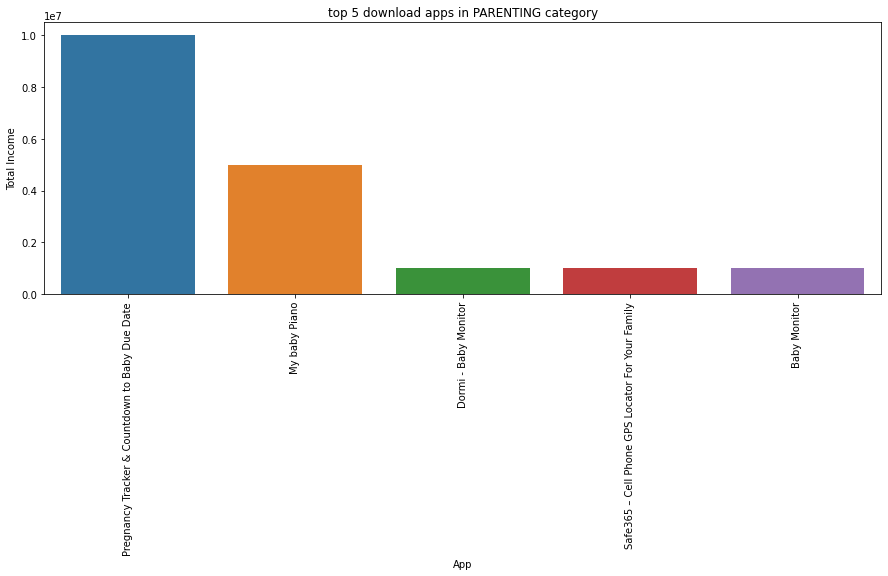

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3626,The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,4.4,1558437.0,18.152679,50000000.0,Free,0.0,Everyone,Weather,"August 1, 2018",Varies with device,Varies with device,0.0
3628,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2053404.0,18.152679,50000000.0,Free,0.0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device,0.0
3649,"GO Weather - Widget, Theme, Wallpaper, Efficient",WEATHER,4.5,1422858.0,18.152679,50000000.0,Free,0.0,Everyone,Weather,"August 3, 2018",Varies with device,Varies with device,0.0
5512,AccuWeather: Daily Forecast & Live Weather Rep...,WEATHER,4.4,2052407.0,18.152679,50000000.0,Free,0.0,Everyone,Weather,"August 2, 2018",Varies with device,Varies with device,0.0
4725,Weather & Clock Widget for Android,WEATHER,4.4,2371543.0,11.000000,50000000.0,Free,0.0,Everyone,Weather,"June 4, 2018",5.9.4.0,4.0.3 and up,0.0


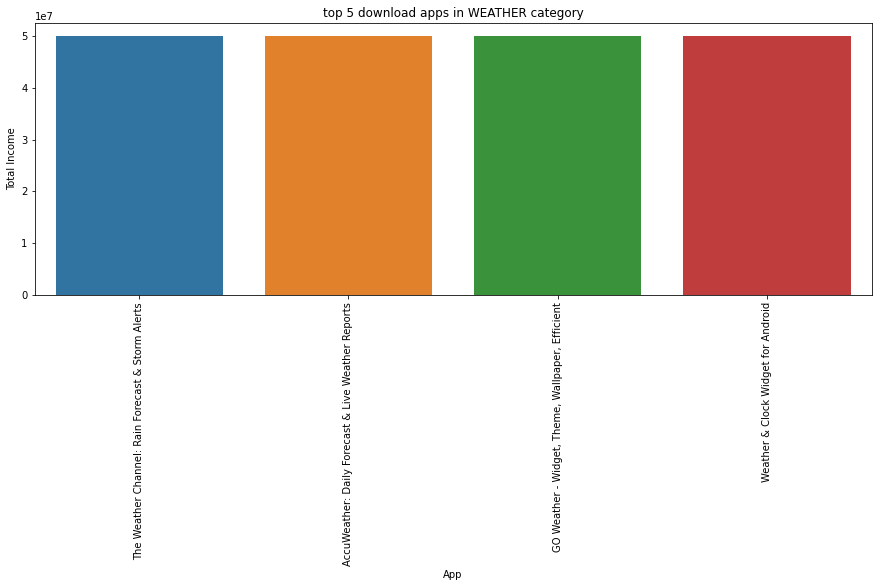

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
3928,YouTube,VIDEO_PLAYERS,4.3,25623548.0,18.152679,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,0.0
3665,YouTube,VIDEO_PLAYERS,4.3,25655305.0,18.152679,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,0.0
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384.0,18.152679,1.000000e+09,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,0.0
4365,MX Player,VIDEO_PLAYERS,4.5,6469179.0,18.152679,5.000000e+08,Free,0.0,Everyone,Video Players & Editors,"August 1, 2018",Varies with device,Varies with device,0.0
3703,MX Player,VIDEO_PLAYERS,4.5,6474426.0,18.152679,5.000000e+08,Free,0.0,Everyone,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,0.0


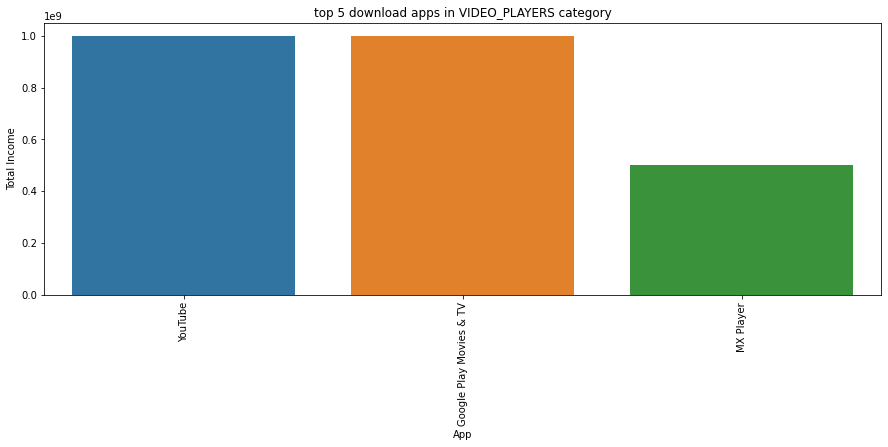

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,0.0
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,0.0
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,0.0
4115,Twitter,NEWS_AND_MAGAZINES,4.3,11657972.0,18.152679,5.000000e+08,Free,0.0,Mature 17+,News & Magazines,"July 30, 2018",Varies with device,Varies with device,0.0
3819,Flipboard: News For Our Time,NEWS_AND_MAGAZINES,4.4,1284018.0,18.152679,5.000000e+08,Free,0.0,Everyone 10+,News & Magazines,"August 3, 2018",Varies with device,Varies with device,0.0


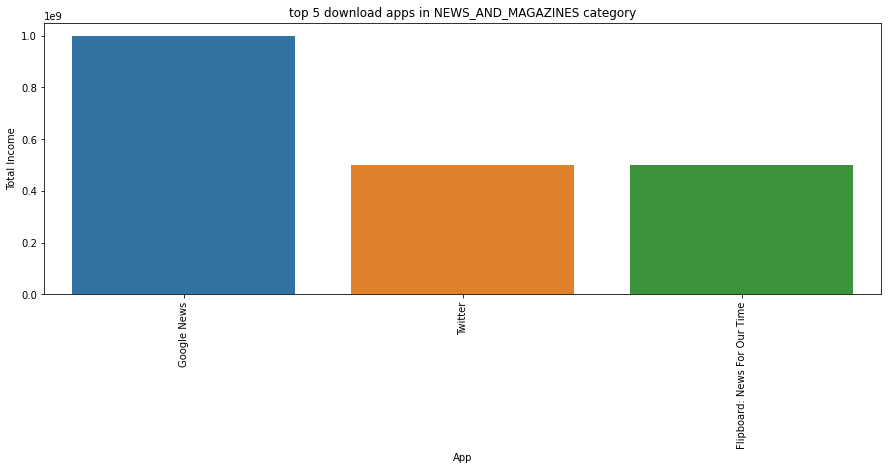

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Income
4634,Uber,MAPS_AND_NAVIGATION,4.2,4921866.0,18.152679,100000000.0,Free,0.0,Everyone,Maps & Navigation,"August 2, 2018",Varies with device,Varies with device,0.0
4717,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7231017.0,18.152679,100000000.0,Free,0.0,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device,0.0
3827,Uber,MAPS_AND_NAVIGATION,4.2,4928420.0,18.152679,100000000.0,Free,0.0,Everyone,Maps & Navigation,"August 6, 2018",Varies with device,Varies with device,0.0
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629.0,18.152679,100000000.0,Free,0.0,Everyone,Maps & Navigation,"July 29, 2018",Varies with device,Varies with device,0.0
3828,GPS Navigation & Offline Maps Sygic,MAPS_AND_NAVIGATION,4.4,1421884.0,33.000000,50000000.0,Free,0.0,Everyone,Maps & Navigation,"July 26, 2018",17.4.11,4.0.3 and up,0.0


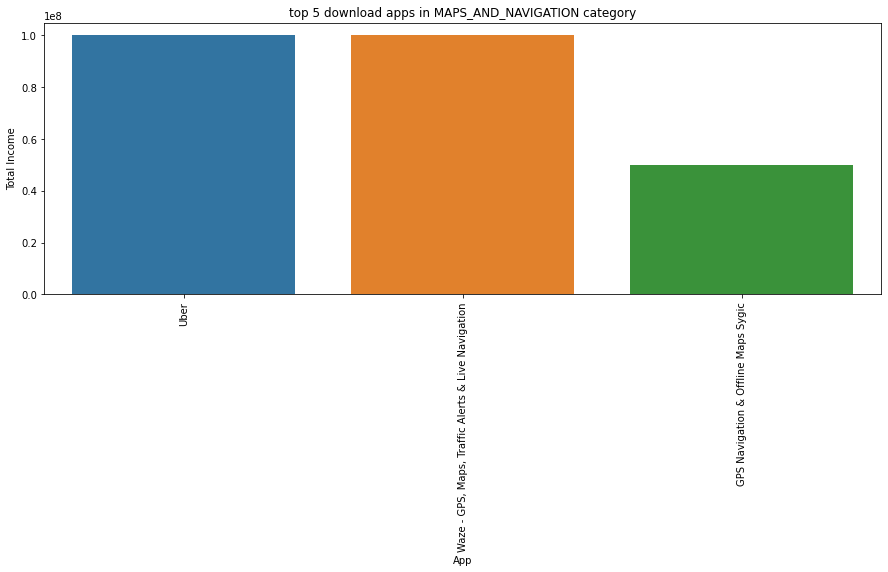

In [162]:
for Category_name in app.Category.unique() :
    install_sorting = app.sort_values(['Installs'], ascending=False)
    install_sorting = install_sorting.loc[app["Category"]== Category_name].head(5)
    #print(app.App.loc[App[in]])
    display(install_sorting)
    plt.figure(figsize=(15, 5))
    sns.barplot(x='App', y='Installs', data=install_sorting)
    plt.xticks(rotation=90)
    plt.ylabel('Total Income')
    plt.title(f'top 5 download apps in {Category_name} category')
    plt.show()
    

In [152]:
app.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

# print a tabel and a plot chart for top 5 download apps with smallest size and highest downloading number

In [132]:
size_sort= app.sort_values(['Installs','Size'], ascending=[False,True]).head(7)

In [134]:
#size_sort = app.sort_values(by='Installs', ascending=False)

In [135]:
size_sort

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3736,Google News,NEWS_AND_MAGAZINES,3.9,877635.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065.0,13.000000,1.000000e+09,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,18.152679,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,18.152679,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


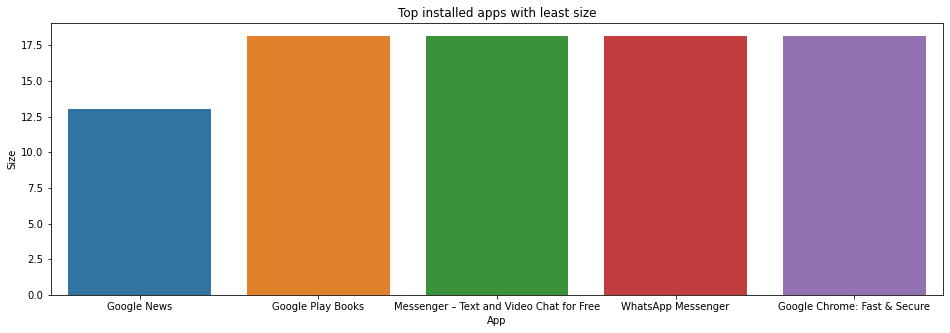

In [136]:
plt.figure(figsize=(16,5))
sns.barplot(x='App',y='Size',data=size_sort)
plt.ylabel('Size')
plt.title('Top installed apps with least size')
plt.show()

In [118]:
Category_paid_price= paid_app.groupby('Category')['Price'].sum().reset_index()
Category_paid_price.sort_values('Price',ascending=False).head(5)

,Category,Price
10,FINANCE,2900.83
9,FAMILY,2420.82
15,LIFESTYLE,2360.87
17,MEDICAL,1020.69
12,GAME,287.30


In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Category', y='Installs', data=category_total_installs)
plt.xticks(rotation=90)
plt.ylabel('Installs')
plt.title('Total installs for each category')
plt.show()

In [ ]:
app['Reviews'].dtype

In [ ]:
app['Reviews'].astype(float) # Our first try to convert the data into float

In [ ]:
app['Reviews']= clean_reviews(reviews) # apply the changes to the column Reviews in our table

In [ ]:
reviews = [i for i in app['Reviews']] # Create a list that contains each value in column 'Review'

def clean_reviews (reviews_list) : # reviews list will be the list that we just created
    clean_data = []
    for review in reviews_list :
        if 'M' in review :
            review = review.replace('M','') # Delete the 'M' Value when we find it in a review from the review list
            review = float(review)          # Now we can change that value into float to apply math operation
            review = review *1000000        # After that we multiply the value by a million to as a replacement for the letter 'M'
        clean_data.append(review) # now we put all review values including the processed M in a clean list
    return clean_data # return the cleaned data after fixing the 'M' value

In [ ]:
# Now let's try converting to Float again and check if we have another error
app['Reviews'] = app['Reviews'].astype(float)
# it works now our data is converted to Float

In [ ]:
app.Reviews.dtype